# Name: Gaurav Rajesh Makasare
# USCID: 7559721394
# email: makasare@usc.edu

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import itertools
import math
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, roc_curve, auc, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_auc_score

# 1. Tree-Based Methods

# (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a testset. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu- meric.

In [465]:
trainset = pd.read_csv('../data/aps_failure_training_set.csv', encoding = 'utf-8', skiprows=20)
testset = pd.read_csv('../data/aps_failure_test_set.csv', encoding = 'utf-8', skiprows=20)

In [466]:
print(trainset)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_0

In [467]:
print(testset)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816     na        1010    936      0      0      0      0   
4       neg    1814     na         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852     na  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636     na        1670   1518      0      0      0      0   
15998   neg     110     na          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 

In [468]:
trainset = trainset.replace('na', np.nan)
testset = testset.replace('na', np.nan)


In [469]:
print(trainset)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002    NaN         664    186      0      0      0      0   
59996   neg    2286    NaN  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292    NaN  2130706432    494      0      0      0      0   
59999   neg   40222    NaN         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_0

In [470]:
print(testset)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816    NaN        1010    936      0      0      0      0   
4       neg    1814    NaN         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852    NaN  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636    NaN        1670   1518      0      0      0      0   
15998   neg     110    NaN          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 

In [471]:
#Training set as X and Y
X_train = trainset.iloc[:, 1:]
Y_train = trainset.iloc[:, 0]
#Test sets as X and Y
X_test = testset.iloc[:, 1:]
Y_test = testset.iloc[:, 0]

In [472]:
# Y_train = Y_train.replace(regex=['pos'], value='1')
# Y_train = Y_train.replace(regex=['neg'], value='0')
# Y_test = Y_test.replace(regex=['pos'], value='1')
# Y_test = Y_test.replace(regex=['neg'], value='0')
Y_train = Y_train.replace(to_replace ="pos", value = 1).replace(to_replace ="neg", value = 0)
Y_test = Y_test.replace(to_replace ="pos", value = 1).replace(to_replace ="neg", value = 0)

In [473]:
print(Y_train)

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64


# b) Data PreparationThis data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 1

# i. Research what types of techniques are usually used for dealing with data with missing values.2 Pick at least one of them and apply it to this data in the next steps.3

# We can try using the mean/mode/median of the existing datas to fill these missing datas.

# We can also make use of KNNImputer. By checking the k-nearest neighbors in the dataset for a missing value, we can impute them based on the neighborhood or the closest ‘k points’

In [474]:
# Imputing the dataset using the mean of the values
X = pd.concat([X_train, X_test], axis = 0)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = pd.DataFrame(imputer.transform(X))

In [475]:
X_train = X.iloc[:60000, :]
X_test = X.iloc[60000:, :]


In [476]:
columns = trainset.columns
X_train.columns = columns[1:]
X_test.columns = columns[1:]
X_test.reset_index(drop=True, inplace=True)

In [477]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(60000, 170)
(60000,)
(16000, 170)
(16000,)


In [478]:
X = pd.concat([X_train, X_test])
X.reset_index(drop=True, inplace=True)
Y = pd.concat([Y_train, Y_test])
Y.reset_index(drop=True, inplace=True)

values = pd.concat([X, Y], axis=1)
print(values)

        aa_000   ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0      76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0     0.0   
1      33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0     0.0   
2      41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0     0.0   
3         12.0  0.00000  7.000000e+01      66.000000     0.0    10.0     0.0   
4      60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0     0.0   
...        ...      ...           ...            ...     ...     ...     ...   
75995  81852.0  0.72556  2.130706e+09     892.000000     0.0     0.0     0.0   
75996     18.0  0.00000  5.200000e+01      46.000000     8.0    26.0     0.0   
75997  79636.0  0.72556  1.670000e+03    1518.000000     0.0     0.0     0.0   
75998    110.0  0.72556  3.600000e+01      32.000000     0.0     0.0     0.0   
75999      8.0  0.00000  6.000000e+00       4.000000     2.0     2.0     0.0   

       ag_001  ag_002  ag_003  ...    e

In [479]:
print(values)


        aa_000   ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0      76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0     0.0   
1      33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0     0.0   
2      41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0     0.0   
3         12.0  0.00000  7.000000e+01      66.000000     0.0    10.0     0.0   
4      60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0     0.0   
...        ...      ...           ...            ...     ...     ...     ...   
75995  81852.0  0.72556  2.130706e+09     892.000000     0.0     0.0     0.0   
75996     18.0  0.00000  5.200000e+01      46.000000     8.0    26.0     0.0   
75997  79636.0  0.72556  1.670000e+03    1518.000000     0.0     0.0     0.0   
75998    110.0  0.72556  3.600000e+01      32.000000     0.0     0.0     0.0   
75999      8.0  0.00000  6.000000e+00       4.000000     2.0     2.0     0.0   

       ag_001  ag_002  ag_003  ...    e

In [480]:
# transformer = Normalizer().fit(data)
transformer = Normalizer().fit(values)
values = pd.DataFrame(transformer.transform(values))
new_attr = list(columns[1:]) + ['class']
values.columns = new_attr
print(values)


         aa_000        ab_000    ac_000        ad_000    ae_000    af_000  \
0      0.000036  3.404981e-10  0.999919  1.314011e-07  0.000000  0.000000   
1      0.002565  5.630437e-08  0.000000  1.168907e-02  0.000000  0.000000   
2      0.004218  7.457451e-08  0.000023  1.027819e-05  0.000000  0.000000   
3      0.000007  0.000000e+00  0.000039  3.642765e-05  0.000000  0.000006   
4      0.002348  2.798838e-08  0.000053  1.766728e-05  0.000000  0.000000   
...         ...           ...       ...           ...       ...       ...   
75995  0.000038  3.405057e-10  0.999941  4.186159e-07  0.000000  0.000000   
75996  0.000010  0.000000e+00  0.000029  2.538671e-05  0.000004  0.000014   
75997  0.004065  3.703602e-08  0.000085  7.748587e-05  0.000000  0.000000   
75998  0.000060  3.965473e-07  0.000020  1.748926e-05  0.000000  0.000000   
75999  0.000004  0.000000e+00  0.000003  2.208392e-06  0.000001  0.000001   

       ag_000  ag_001  ag_002    ag_003  ...    ee_003    ee_004    ee_005 

# ii. For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.

In [481]:
variations = []
for i in values.columns:
    variations.append(np.std(values[i])/np.mean(values[i]))
print(variations) 
# CV = [np.std(values[i])/np.mean(values[i]) for i in values.columns]
# print (CV)

[1.8029814329902942, 2.804177492257097, 1.9231698578656982, 2.81326998792784, 12.385883909604576, 11.94049809692312, 77.27744078382806, 25.82940057249092, 10.25954263645404, 4.859326181096698, 2.7492019216928694, 1.3850353788491576, 1.2175511566101478, 1.547541931404085, 2.4028728029455735, 13.467871066179184, 1.0371522406495133, 10.758719390428912, 45.58460440698205, 73.39779731365029, 3.878169527030578, 3.6833642301687948, 1.003010475235001, 1.0238487253267128, 1.049274072539485, 1.230330694661354, 10.359129513892489, 88.66336724280333, 13.699860756637875, 65.77467447160232, 2.7535422969479173, 2.4062603589303033, 25.805839147098585, 31.57458427577765, 22.770341336946693, 24.375786811749315, 19.76502934363174, 3.3238588481285936, 1.4643976801158716, 1.4046092917442212, 1.7101386423470957, 32.6132893332615, 6.4261137634862235, 6.004697284272709, 4.551796938853107, 2.678380544344603, 1.4560427422233106, 1.2967953272173418, 5.282808566871149, 7.431128707298939, 14.96848070761049, 66.726

# iii. Plot a correlation matrix for your features using pandas or any other tool.

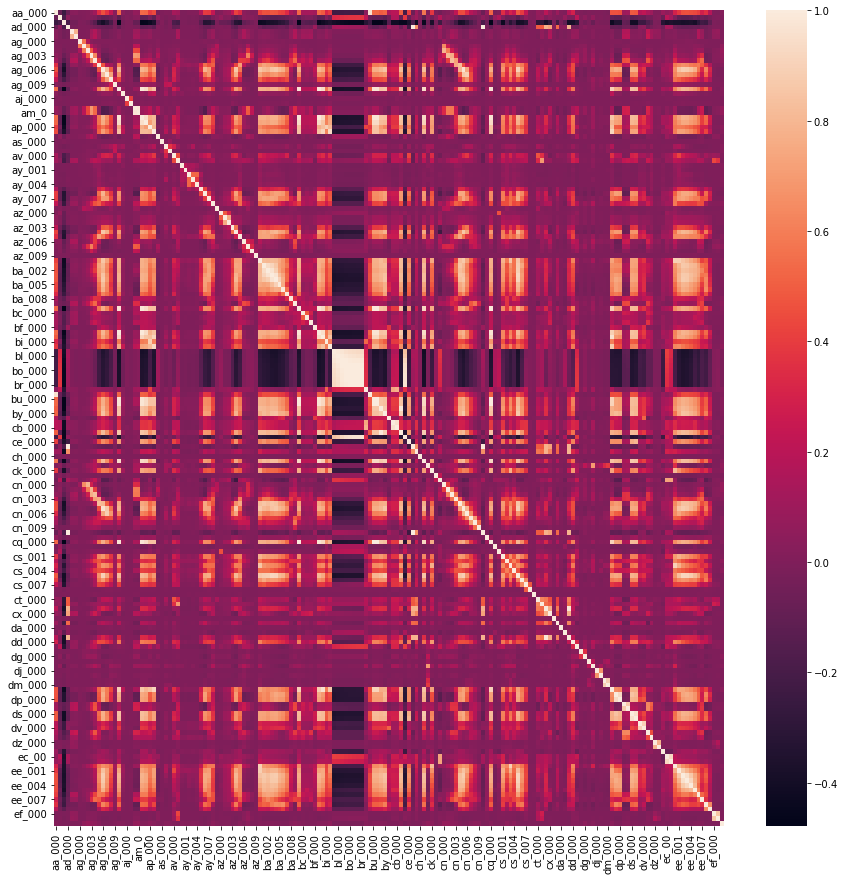

In [482]:
cmatrix = mplt.figure(figsize = (15, 15))
sns.heatmap(values.corr())
mplt.show()

In [483]:
# col = columns
# feat = dict()
# # for i in 
# #print(col)
# for i in range(len(col)):
#     feat[col[i]] = variations[i]
# sorted_values = sorted(feat.values(), reverse=True) # Sort the values
# print(feat)

# for i in sorted_values:
#     for k in feat.keys():
#         if feat[k] == i:
#             sorted_dict[k] = feat[k]
#             break
            
# print(sorted_dict)

# iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plotsfor them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.


In [484]:
column_dict = {}
for i in zip(X, variations):
    column_dict[i[0]] = i[1]

column_dict = {i:j for i,j in sorted(column_dict.items(), key = lambda x: x[1], reverse=True)}

print(column_dict)

{'dj_000': 123.72350967927535, 'cs_009': 111.7573022595111, 'ch_000': 91.80985302769221, 'as_000': 88.66336724280333, 'ag_000': 77.27744078382806, 'ak_000': 73.39779731365029, 'ef_000': 71.70734753535096, 'az_009': 66.72657980035349, 'au_000': 65.77467447160232, 'dh_000': 52.56252316515997, 'dz_000': 51.21974152649036, 'df_000': 48.1300911953102, 'aj_000': 45.58460440698205, 'cs_008': 38.319878603621355, 'eg_000': 37.19218251907216, 'cy_000': 36.222309409807714, 'ea_000': 34.54154250876584, 'dk_000': 33.835872819818846, 'ay_009': 32.6132893332615, 'ay_001': 31.57458427577765, 'dl_000': 29.70161218781102, 'ag_001': 25.82940057249092, 'ay_000': 25.805839147098585, 'dm_000': 24.843880584113812, 'ay_003': 24.375786811749315, 'da_000': 24.180562301864764, 'ay_002': 22.770341336946693, 'ay_004': 19.76502934363174, 'cl_000': 17.24075353982413, 'az_008': 14.96848070761049, 'cn_000': 14.86422206352829, 'at_000': 13.699860756637875, 'ag_009': 13.467871066179184, 'dg_000': 12.804244602458322, 'cn

In [485]:
features = dict(itertools.islice(column_dict.items(), int(math.sqrt(170))))

In [486]:
print("Features that are selected for visualization are : ", list(features.keys()))


Features that are selected for visualization are :  ['dj_000', 'cs_009', 'ch_000', 'as_000', 'ag_000', 'ak_000', 'ef_000', 'az_009', 'au_000', 'dh_000', 'dz_000', 'df_000', 'aj_000']


Scatter Plots are as follows: 


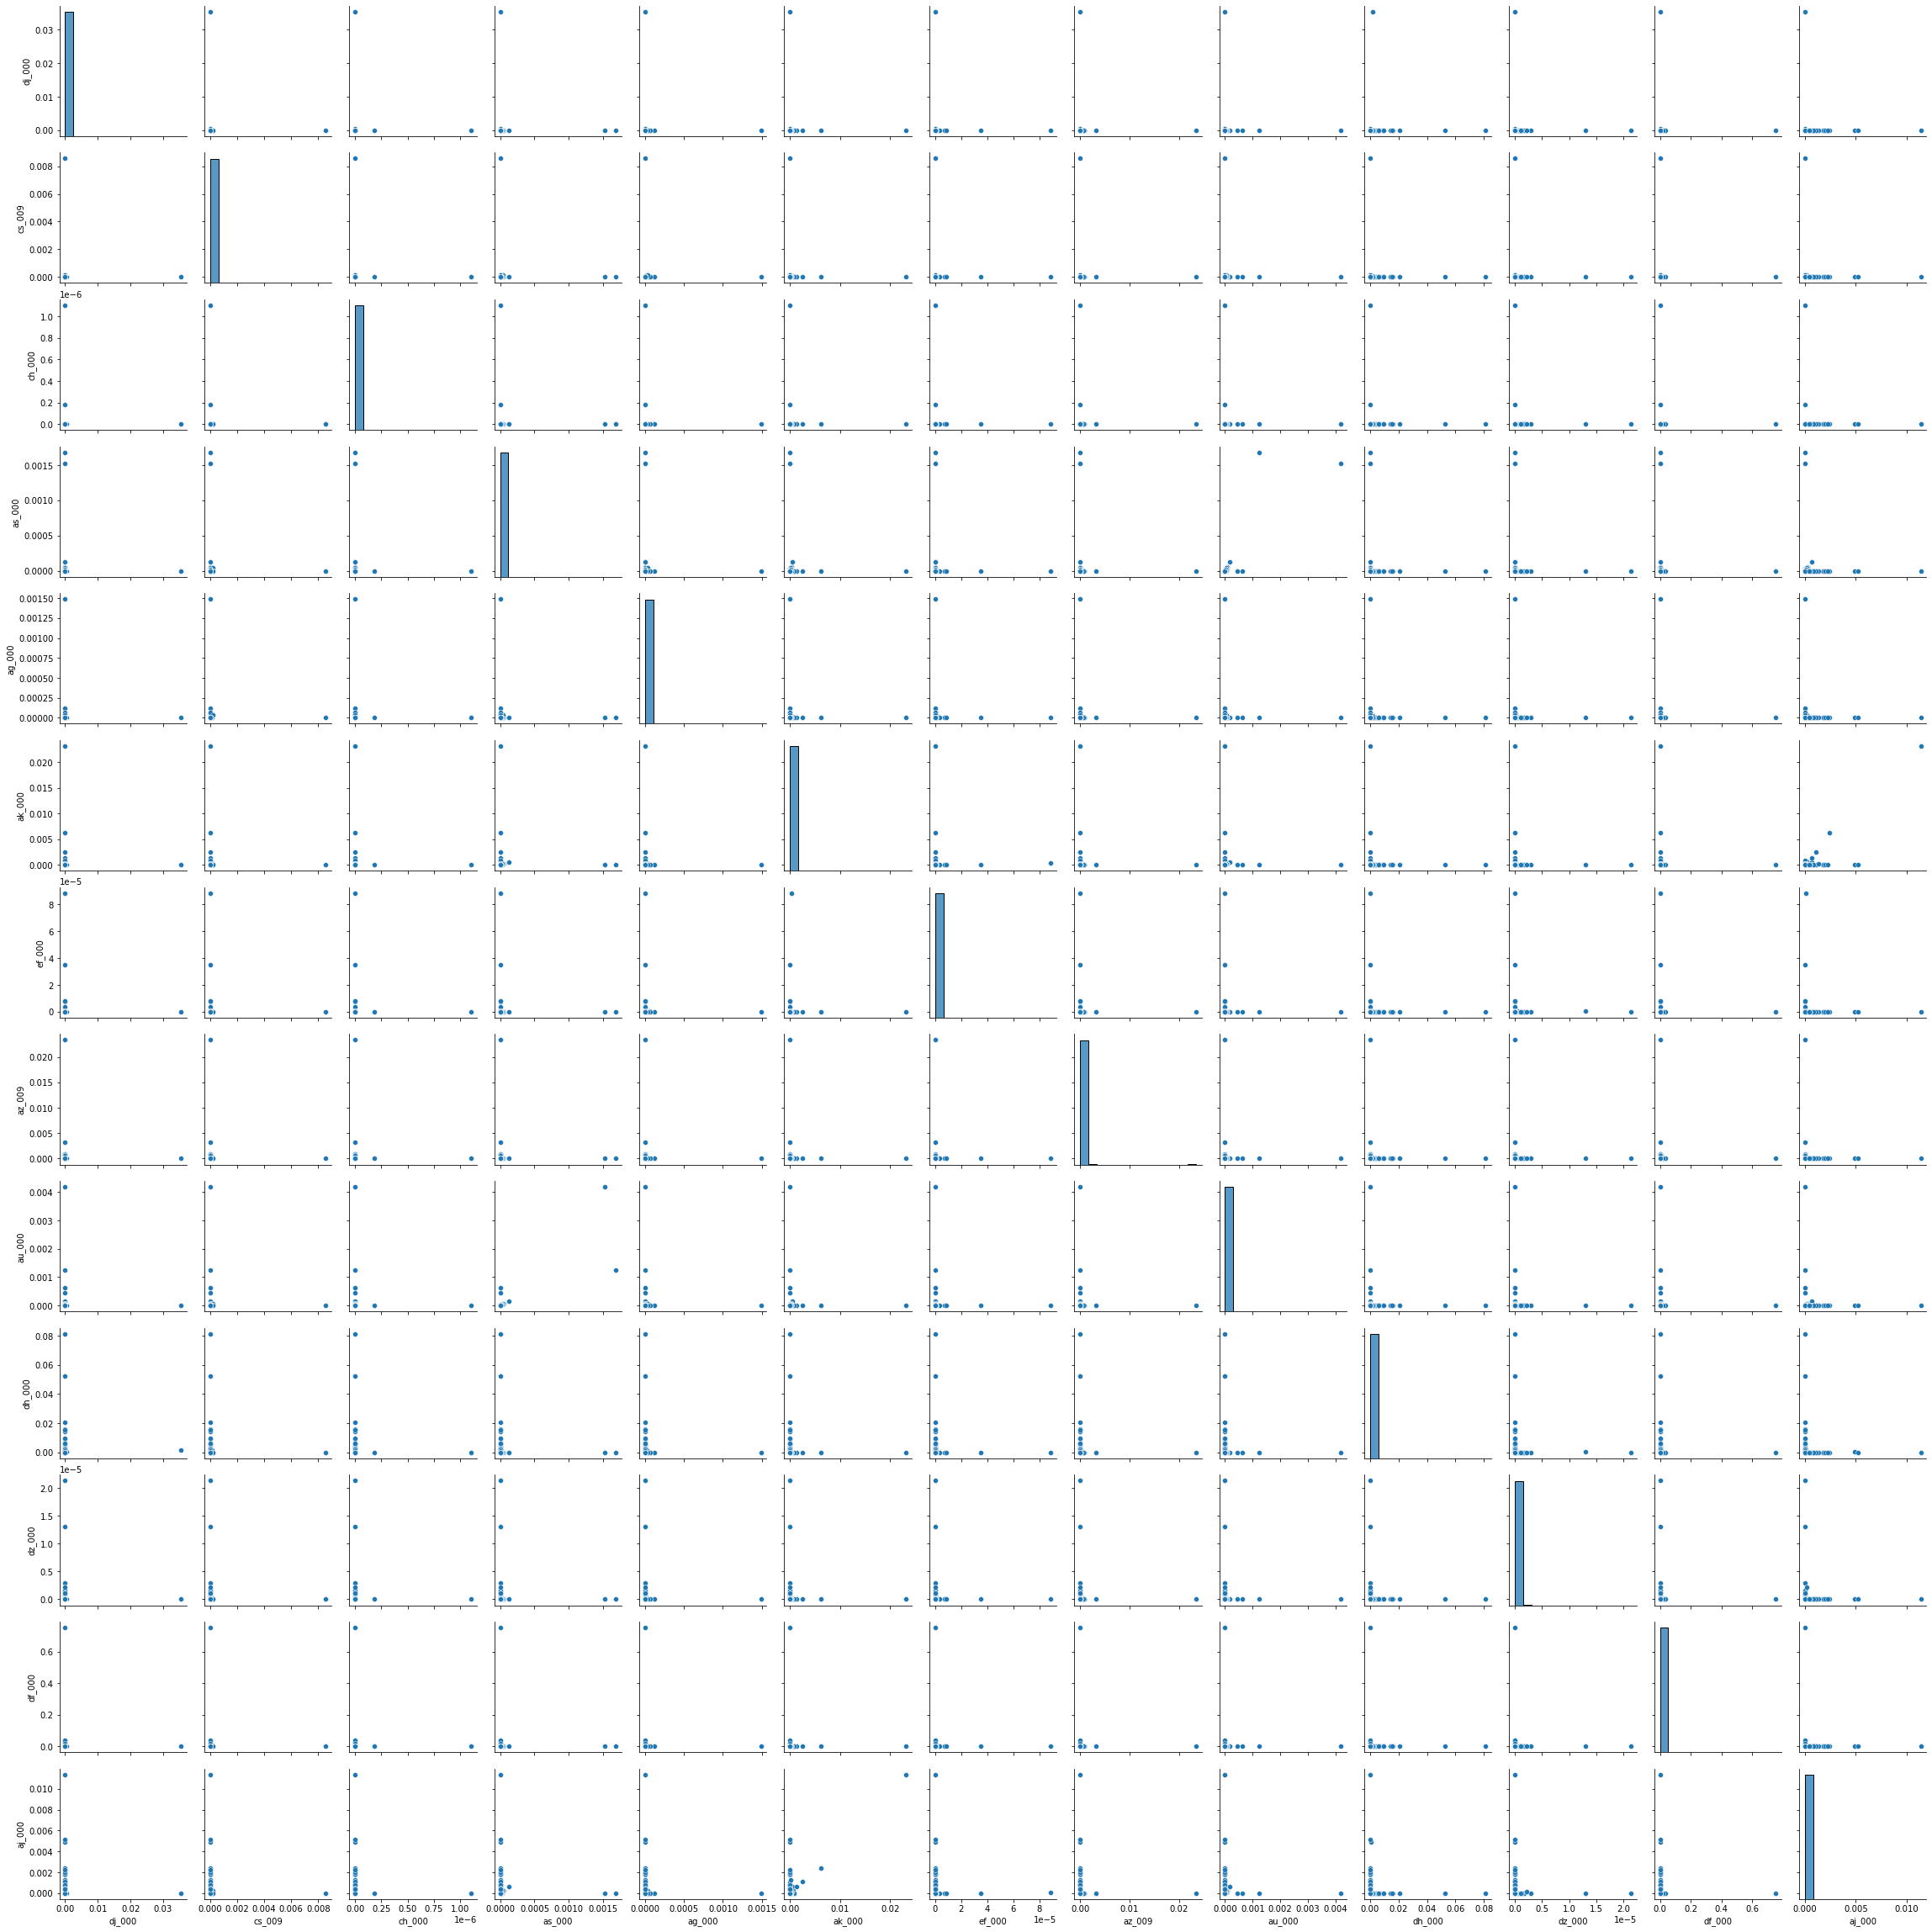

In [344]:
print("Scatter Plots are as follows: ")
scatter_plot = sns.pairplot(values.sample(frac=0.1)[features.keys()])
mplt.show()

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

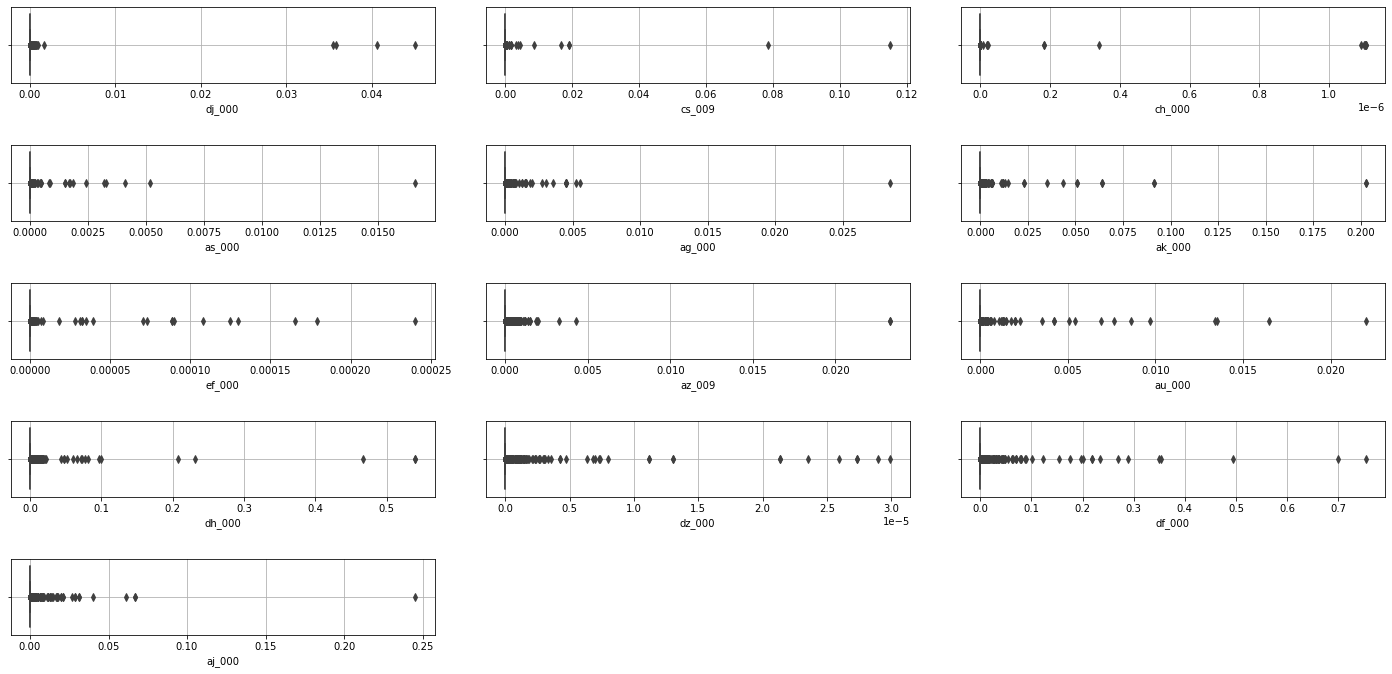

In [345]:
selected_col = list(features.keys())
fig, axes = mplt.subplots(5, 3, figsize=(20, 10))
count = 0
for i in range(5):
    for j in range(3):
        if count <= len(selected_col)-1:
            sns.boxplot(values[selected_col[count]], ax=axes[i, j])
            axes[i, j].grid(True)
            count += 1
axes[4, 1].remove()
axes[4, 2].remove()
fig.tight_layout(pad=3.0)

# v. Determine the number of positive and negative data. Is this data set imbal- anced?

In [487]:
postrain = len(Y_train[Y_train == 1])
postest = len(Y_test[Y_test == 1])

negtrain = len(Y_train[Y_train == 0])
negtest = len(Y_test[Y_test == 0])

print("Positive cases: ", postrain + postest)
print("Negative cases: ", negtrain + negtest)

Positive cases:  1375
Negative cases:  74625


# Ans: Yes the data set is imbalanced

# c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [488]:
# X = pd.concat([X_train, X_test])
# X.reset_index(drop=True, inplace=True)
# Y = pd.concat([Y_train, Y_test])
# Y.reset_index(drop=True, inplace=True)

# values = pd.concat([X, Y], axis=1)

In [489]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True)
rfmodel.fit(X_train, Y_train)
YPRED = rfmodel.predict(X_test)
Y_PRED_PROB = rfmodel.predict_proba(X_test)[::,1]
falp, truep, t = roc_curve(Y_test, Y_PRED_PROB)
print(falp, truep, t)

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 6.4000e-05 6.4000e-05 6.4000e-05 6.4000e-05
 6.4000e-05 6.4000e-05 6.4000e-05 6.4000e-05 6.4000e-05 6.4000e-05
 6.4000e-05 6.4000e-05 1.2800e-04 1.2800e-04 1.2800e-04 1.2800e-04
 1.2800e-04 1.2800e-04 1.9200e-04 1.9200e-04 2.5600e-04 3.2000e-04
 3.2000e-04 4.4800e-04 4.4800e-04 5.1200e-04 5.1200e-04 5.7600e-04
 7.6800e-04 8.3200e-04 8.9600e-04 9.6000e-04 1.0880e-03 1.0880e-03
 1.2160e-03 1.2160e-03 1.3440e-03 1.6000e-03 1.6000e-03 1.7280e-03
 1.7280e-03 1.7920e-03 1.7920e-03 1.8560e-03 2.0480e-03 2.2400e-03
 2.4320e-03 2.5600e-03 2.8160e-03 3.0080e-03 3.1360e-03 3.2640e-03
 3.4560e-03 4.0960e-03 4.1600e-03 4.4800e-03 4.6080e-03 4.9920e-03
 5.1200e-03 5.6960e-03 5.8240e-03 6.4000e-03 6.6560e-03 7.2960e-03
 7.6800e-03 8.5760e-03 9.3440e-03 9.8560e-03 1.0560e-02 1.1584e-02
 1.2224e-02 1.3504e-02 1.4528e-02 1.5616e-02 1.7472e-02 1.9520

## for test data

In [490]:
print('Confusion Matrix :')
print()
print(confusion_matrix(Y_test, YPRED))
cm = confusion_matrix(Y_test, YPRED)
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ", fp + fn)

Confusion Matrix :

[[15608    17]
 [  111   264]]
Total missclassification values:  128


In [491]:
print('Classification Report :')
print()
print(classification_report(Y_test, YPRED))

Classification Report :

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.70      0.80       375

    accuracy                           0.99     16000
   macro avg       0.97      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000



In [492]:
print('Out Of Bag Score : ', rfmodel.oob_score_)

Out Of Bag Score :  0.9937833333333334


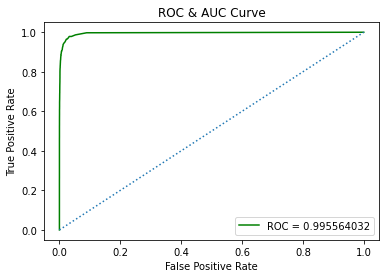

In [493]:
area = auc(falp, truep)
mplt.plot(falp, truep, color='green', label='ROC = ' + str(area))
mplt.plot([0, 1], [0, 1], linestyle='dotted')
mplt.xlabel('False Positive Rate')
mplt.ylabel('True Positive Rate')
mplt.title('ROC & AUC Curve')
mplt.legend()
mplt.show()

In [494]:
print('Testing score: ', rfmodel.score(X_test, Y_test))
auc1 = roc_auc_score(Y_test, Y_PRED_PROB)
print("Auc score for testing data is", auc)

Testing score:  0.992
Auc score for testing data is <function auc at 0x7fbf4bc4d0d0>


## for train data

In [495]:
YPRED = rfmodel.predict(X_train)
Y_PRED_PROB = rfmodel.predict_proba(X_train)[::,1]
falp, truep, t = roc_curve(Y_train, Y_PRED_PROB)
print('Confusion Matrix :')
print()
print(confusion_matrix(Y_train, YPRED))
cm = confusion_matrix(Y_train, YPRED)
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ", fp + fn)

Confusion Matrix :

[[59000     0]
 [    0  1000]]
Total missclassification values:  0


In [496]:
print('Classification Report :')
print()
print(classification_report(Y_train, YPRED))

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [497]:
print('Out Of Bag Score : ', rfmodel.oob_score_)

Out Of Bag Score :  0.9937833333333334


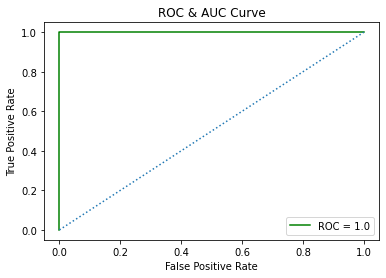

In [498]:
area = auc(falp, truep)
mplt.plot(falp, truep, color='green', label='ROC = ' + str(area))
mplt.plot([0, 1], [0, 1], linestyle='dotted')
mplt.xlabel('False Positive Rate')
mplt.ylabel('True Positive Rate')
mplt.title('ROC & AUC Curve')
mplt.legend()
mplt.show()

In [499]:
auc1 = roc_auc_score(Y_train, Y_PRED_PROB)
print("Auc score for training data is", auc1)
print('Training score: ',rfmodel.score(X_train, Y_train))

Auc score for training data is 1.0
Training score:  1.0


### Accuracy of training set is high

# (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [500]:
smt = SMOTE(random_state = 0)
smtrain = smt.fit_sample(X_train, Y_train)
smtest = smt.fit_sample(X_test, Y_test)
print(smtrain)

(              aa_000    ab_000        ac_000         ad_000    ae_000  \
0       7.669800e+04  0.725560  2.130706e+09     280.000000  0.000000   
1       3.305800e+04  0.725560  0.000000e+00  150629.962105  0.000000   
2       4.104000e+04  0.725560  2.280000e+02     100.000000  0.000000   
3       1.200000e+01  0.000000  7.000000e+01      66.000000  0.000000   
4       6.087400e+04  0.725560  1.368000e+03     458.000000  0.000000   
...              ...       ...           ...            ...       ...   
117995  1.864646e+05  0.562033  8.030112e+02     546.109637  0.000000   
117996  1.784146e+06  0.725560  3.564398e+08  110212.359377  6.736959   
117997  7.238153e+05  0.725560  3.564398e+08  150629.962105  6.296830   
117998  3.420017e+05  0.725560  3.564398e+08   80720.503560  3.126716   
117999  2.337864e+05  5.907352  9.298661e+02     980.356295  0.000000   

           af_000  ag_000        ag_001         ag_002        ag_003  ...  \
0        0.000000     0.0      0.000000      

# for test

In [501]:
smtXtrain = pd.DataFrame(smtrain[0])
smtYtrain = pd.DataFrame(smtrain[1], columns=['class'])
smtXtest = pd.DataFrame(smtest[0])
smtYtest = pd.DataFrame(smtest[1], columns=['class'])

rfmodel = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True)
rfmodel.fit(smtXtrain, smtYtrain)
YPRED = rfmodel.predict(smtXtest)
Y_PRED_PROB = rfmodel.predict_proba(smtXtest)[::,1]

/var/folders/qj/yfljfj0j5hl97dsfxl00zlq40000gn/T/ipykernel_56613/759471041.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(smtXtrain, smtYtrain)


In [502]:
falp1, truep1, t = roc_curve(smtYtest, Y_PRED_PROB)
print(falp, truep, t)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.77966102e-05 8.47457627e-05 1.69491525e-04
 2.71186441e-04 3.55932203e-04 5.25423729e-04 5.76271186e-04
 7.45762712e-04 8.81355932e-04 1.42372881e-03 1.71186441e-03
 2.06779661e-03 2.61016949e-03 3.13559322e-03 3.76271186e-03
 4.35593220e-03 5.13559322e-03 5.96610169e-03 6.88135593e-03
 7.89830508e-03 9.28813559e-03 1.12203390e-02 1.33389831e-02
 1.57118644e-02 1.905084

In [503]:
print('Confusion Matrix :')
print()
print(confusion_matrix(smtYtest, YPRED))
cm = confusion_matrix(smtYtest, YPRED)
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ", fp + fn)

Confusion Matrix :

[[15549    76]
 [  804 14821]]
Total missclassification values:  880


In [504]:
print('Classification Report :')
print()
print(classification_report(smtYtest, YPRED))

Classification Report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15625
           1       0.99      0.95      0.97     15625

    accuracy                           0.97     31250
   macro avg       0.97      0.97      0.97     31250
weighted avg       0.97      0.97      0.97     31250



In [505]:
print('Out Of Bag Score : ', rfmodel.oob_score_)

Out Of Bag Score :  0.9969237288135593


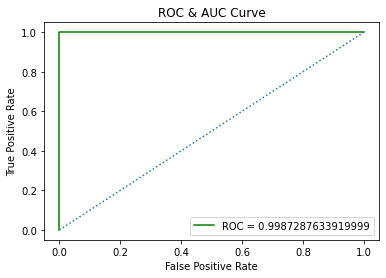

In [506]:
area = auc(falp1, truep1)
mplt.plot(falp, truep, color='green', label='ROC = ' + str(area))
mplt.plot([0, 1], [0, 1], linestyle='dotted')
mplt.xlabel('False Positive Rate')
mplt.ylabel('True Positive Rate')
mplt.title('ROC & AUC Curve')
mplt.legend()
mplt.show()

In [507]:
print('Testing score: ', rfmodel.score(smtXtest, smtYtest))
auc = roc_auc_score(smtYtest, Y_PRED_PROB)
print("Auc score for testing data is", auc)

Testing score:  0.97184
Auc score for testing data is 0.9987287633919999


# for train

In [508]:
YPRED = rfmodel.predict(smtXtrain)
Y_PRED_PROB = rfmodel.predict_proba(smtXtrain)[::,1]

In [509]:
falp, truep, t = roc_curve(smtYtrain, Y_PRED_PROB)
print(falp, truep, t)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.77966102e-05 1.35593220e-04 2.37288136e-04 3.05084746e-04
 4.57627119e-04 5.25423729e-04 6.44067797e-04 8.81355932e-04
 1.01694915e-03 1.18644068e-03 1.37288136e-03 1.67796610e-03
 2.05084746e-03 2.76271186e-03 3.25423729e-03 3.69491525e-03
 4.06779661e-03 4.88135593e-03 5.52542373e-03 6.27118644e-03
 7.05084746e-03 7.84745763e-03 8.69491525e-03 9.67796610e-03
 1.09152542e-02 1.20508475e-02 1.40338983e-02 1.60508475e-02
 1.86101695e-02 2.09491525e-02 2.38983051e-02 2.82881356e-02
 3.35593220e-02 4.040677

In [510]:
print('Confusion Matrix :')
print()
print(confusion_matrix(smtYtrain, YPRED))
cm = confusion_matrix(smtYtrain, YPRED)
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ", fp + fn)

Confusion Matrix :

[[59000     0]
 [    0 59000]]
Total missclassification values:  0


In [511]:
print('Classification Report :')
print()
print(classification_report(smtYtrain, YPRED))


Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00     59000

    accuracy                           1.00    118000
   macro avg       1.00      1.00      1.00    118000
weighted avg       1.00      1.00      1.00    118000



In [512]:
print('Out Of Bag Score : ', rfmodel.oob_score_)

Out Of Bag Score :  0.9969237288135593


In [514]:
print('Training score: ', rfmodel.score(smtXtrain, smtYtrain))
auc1 = roc_auc_score(smtYtrain, Y_PRED_PROB)
print("Auc score for testing data is", auc1)

Training score:  1.0
Auc score for testing data is 1.0


# (e) XGBoost and Model Trees

# In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [522]:
# xgbmodel = xgb.XGBRegressor(n_estimators=200, max_depth=5, objective="reg:squarederror", silent=1, n_jobs=-1)
# grid = GridSearchCV(estimator = xgbmodel, param_grid={'reg_alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]}, cv=5, n_jobs=-1, return_train_score = True)
# grid.fit(X_train, Y_train)

In [523]:
# best_alpha = grid.best_params_
# print(best_alpha)
# print ('Best parameters for alpha : ', best_alpha['reg_alpha'])


In [524]:
# score = grid.best_score_
# # print('Score: ', score)

In [525]:
# test = grid.cv_results_
# print(test.keys())
# print(test['mean_train_score'])

In [516]:
# YPRED = grid.predict(X_test)
# print(YPRED)

In [517]:
# print(confusion_matrix(Y_test, YPRED.round(), normalize=true))

In [518]:
# print(YPRED.max())

In [519]:
# print(YPRED.min())

In [520]:
# # PREDS = YPRED.flatten()
# pred_class = np.where(YPRED> 0, 1, 0)

In [521]:
# print(confusion_matrix(Y_test, pred_class))

In [80]:
# falp, truep, t = roc_curve(Y_test, pred_class)

In [515]:
# area = auc(falp, truep)
# mplt.plot(falp, truep, color='green', label='ROC = ' + str(area))
# mplt.plot([0, 1], [0, 1], linestyle='dotted')
# mplt.xlabel('False Positive Rate')
# mplt.ylabel('True Positive Rate')
# mplt.title('ROC & AUC Curve')
# mplt.legend()
# mplt.show()

In [530]:
from imblearn.pipeline import Pipeline as imbpipeline
from xgboost import XGBClassifier as XGBR
pipeline = imbpipeline(steps = [['classifier', XGBR(random_state=11,silent=True)]])

kfold = KFold(n_splits=5,shuffle=True,random_state=11)
    
param_grid = {'classifier__reg_alpha':[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2,1.4,1.6,1.8, 1, 2, 3]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, Y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/

[20:41:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:41:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross-validation score: 0.9946166666666667
Test score: 0.994
[20:23:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some param

[20:23:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:23:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mist

[20:23:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:23:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mist

[20:23:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:23:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mist

# for test data

In [286]:
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9946166666666667
Test score: 0.994


In [287]:
grid_search.best_params_

{'classifier__reg_alpha': 1.6}

In [ ]:
grid_search.best_params_

In [301]:
from sklearn.metrics import mean_squared_error as MSE
y_pred = []
boost_model = XGBR(random_state=0,silent=True,reg_alpha=1.6)
boost_model = boost_model.fit(X_train,Y_train)
y_pred = boost_model.predict(X_test)
mse = MSE(Y_test, y_pred)
print("Mean square Error for Testing data : ", mse)

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean square Error for Testing data :  0.006


In [529]:
cmatrix = confusion_matrix(Y_test, y_pred)
cmatrix

ValueError: Found input variables with inconsistent numbers of samples: [16000, 60000]

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


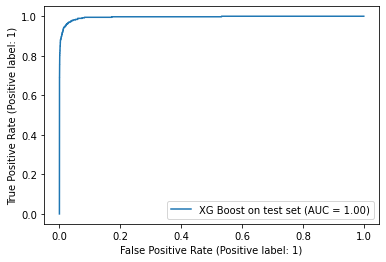

In [528]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(boost_model, X_test, Y_test, name = 'XG Boost on test set')

In [295]:
y_pred_proba = boost_model.predict_proba(X_test)[::,1]
auc = roc_auc_score(Y_test, y_pred_proba)
print("Auc score for testing data is", auc)

Auc score for testing data is 0.9952233813333333


# for train data

In [527]:
y_pred = boost_model.predict(X_train)
mse = MSE(Y_train, y_pred)
print("Mean square Error for Trainting data : ", mse)

Mean square Error for Trainting data :  3.3333333333333335e-05


In [297]:
cm = confusion_matrix(Y_train, y_pred)
cm

array([[59000,     0],
       [    3,   997]])

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


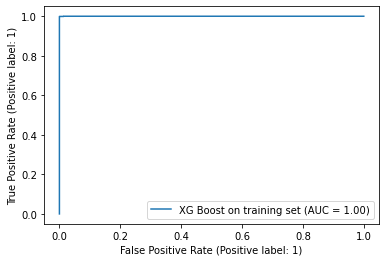

In [526]:
plot_roc_curve(boost_model, X_train, Y_train, name = 'XG Boost on training set')

In [300]:
y_pred_proba = boost_model.predict_proba(X_train)[::,1]
auc = roc_auc_score(Y_train, y_pred_proba)
print("Auc score for training data is", auc)

Auc score for training data is 0.999987220338983


# (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.


In [375]:
# Y_train = Y_train.replace(to_replace = "pos", value = 1).replace(to_replace = "neg", value = 0)
# Y_test = Y_test.replace(to_replace = "pos", value = 1).replace(to_replace = "neg", value = 0)

# smt = SMOTE(random_state = 0)
# smtrain = smt.fit_sample(X_train, Y_train)
# smtest = smt.fit_sample(X_test, Y_test)


# smote_X_train = pd.DataFrame(smtrain[0])
# smote_Y_train = pd.DataFrame(smtrain[1], columns=['class'])
# smote_X_test = pd.DataFrame(smtest[0])
# smote_Y_test = pd.DataFrame(smtest[1], columns=['class'])

In [376]:
# xgbmodel1 = xgb.XGBRegressor(n_estimators=200, max_depth=5, objective="reg:squarederror", silent=1, n_jobs=-1)
# grid = GridSearchCV(estimator = xgbmodel1, param_grid={'reg_alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]}, cv=5, n_jobs=-1, return_train_score = True)
# grid.fit(smote_X_train, smote_Y_train)

In [377]:
# best_alpha = grid.best_params_
# print(best_alpha)
# print ('Best parameters for alpha : ', best_alpha['reg_alpha'])


In [378]:
# score = grid.best_score_
# print('Score: ', score)

In [379]:
# test = grid.cv_results_
# print(test.keys())
# print(test['mean_train_score'])

In [304]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', XGBR(random_state=11,silent=True)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__reg_alpha':[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2,1.4,1.6,1.8, 1, 2, 3]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, Y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/

[19:10:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:10:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross-validation score: 0.9936333333333334
Test score: 0.99275
[18:47:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some par

# for test data

In [380]:
print(f'Cross-validation score  is as follows: {cv_score}\nTest score are: {test_score}')

Cross-validation score  is as follows: 0.9936333333333334
Test score are: 0.9999833333333333


In [306]:
grid_search.best_params_

{'classifier__reg_alpha': 0.05}

In [384]:
test_score = grid_search.score(X_test, Y_test)
print("test score is as follows: ", test_score)

test score is as follows:  0.99275


In [381]:
y_pred = grid_search.best_estimator_.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[15578,    47],
       [   69,   306]])

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


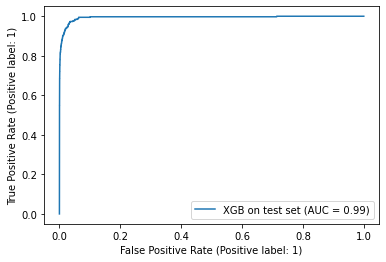

In [386]:
plot_roc_curve(grid_search,X_test, Y_test, name = 'XGB on test set')

In [383]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
auc = roc_auc_score(Y_test, y_pred_proba)
print("Auc score for test set: ", auc)

Auc score for testing data is 0.9941029546666666


In [316]:
y_pred = grid_search.predict(X_train)
mse = MSE(Y_train, y_pred)
print("Mean square Error for Test set : ", mse)

Mean square Error for Testing data :  1.6666666666666667e-05


# for train data

In [385]:
train_score = grid_search.score(X_train, Y_train)
print("Train score is as follows:", train_score)

Train score is as follows: 0.9999833333333333


In [318]:
y_pred = grid_search.best_estimator_.predict(X_train)
confusion_matrix(Y_train, y_pred)

array([[59000,     0],
       [    1,   999]])

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


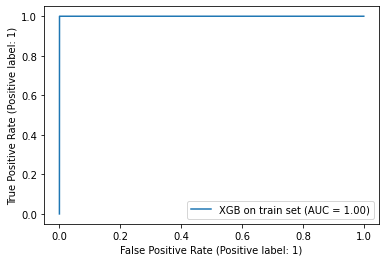

In [387]:
plot_roc_curve(grid_search, X_train, Y_train, name = 'XGB on train set')

In [320]:
y_pred_proba = grid_search.predict_proba(X_train)[::,1]
auc = roc_auc_score(Y_train, y_pred_proba)
print("Auc score for train set: ", auc)

Auc score for training data is 0.9999996949152543
[18:47:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:47:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getti

[18:47:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:47:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mist

# 2. ISLR 6.6.3 

# Ans:

# a. (iv) Steadily decreases: As we increase s from 0, all β 's increase from 0 to their least square estimate values. Training error for 0 β s is the maximum and it steadily decreases to the Ordinary Least Square RSS


# b.(ii) Decrease initially, and then eventually start increasing in a U shape: When s=0, all β s are 0, the model high test RSS. As we increase s, beta s assume non-zero values and model starts fitting well on test data and so test RSS decreases. As beta s approach their max values, they start to over fit, so this increases test RSS.


# c.(iii) Steadily increase: When s=0, the model predicts a constant and has almost 0 variance. As s increases, the models includes more β s and their value increases. At this point, the values of β s become highly dependent on train data, thus variance increases.


# d.(iv) Steadily decrease: When s=0, the model effectively predicts a constant and hence the prediction is far from actual value. Thus bias is high. with increase in s, more β s become non-zero and thus the model continues to fit training data better. And thus, bias decreases.

# e.(v) Remains constant: Irreducible error is model independent and hence irrespective of the choice of s, remains constant.

# 3. ISLR, 6.6.5

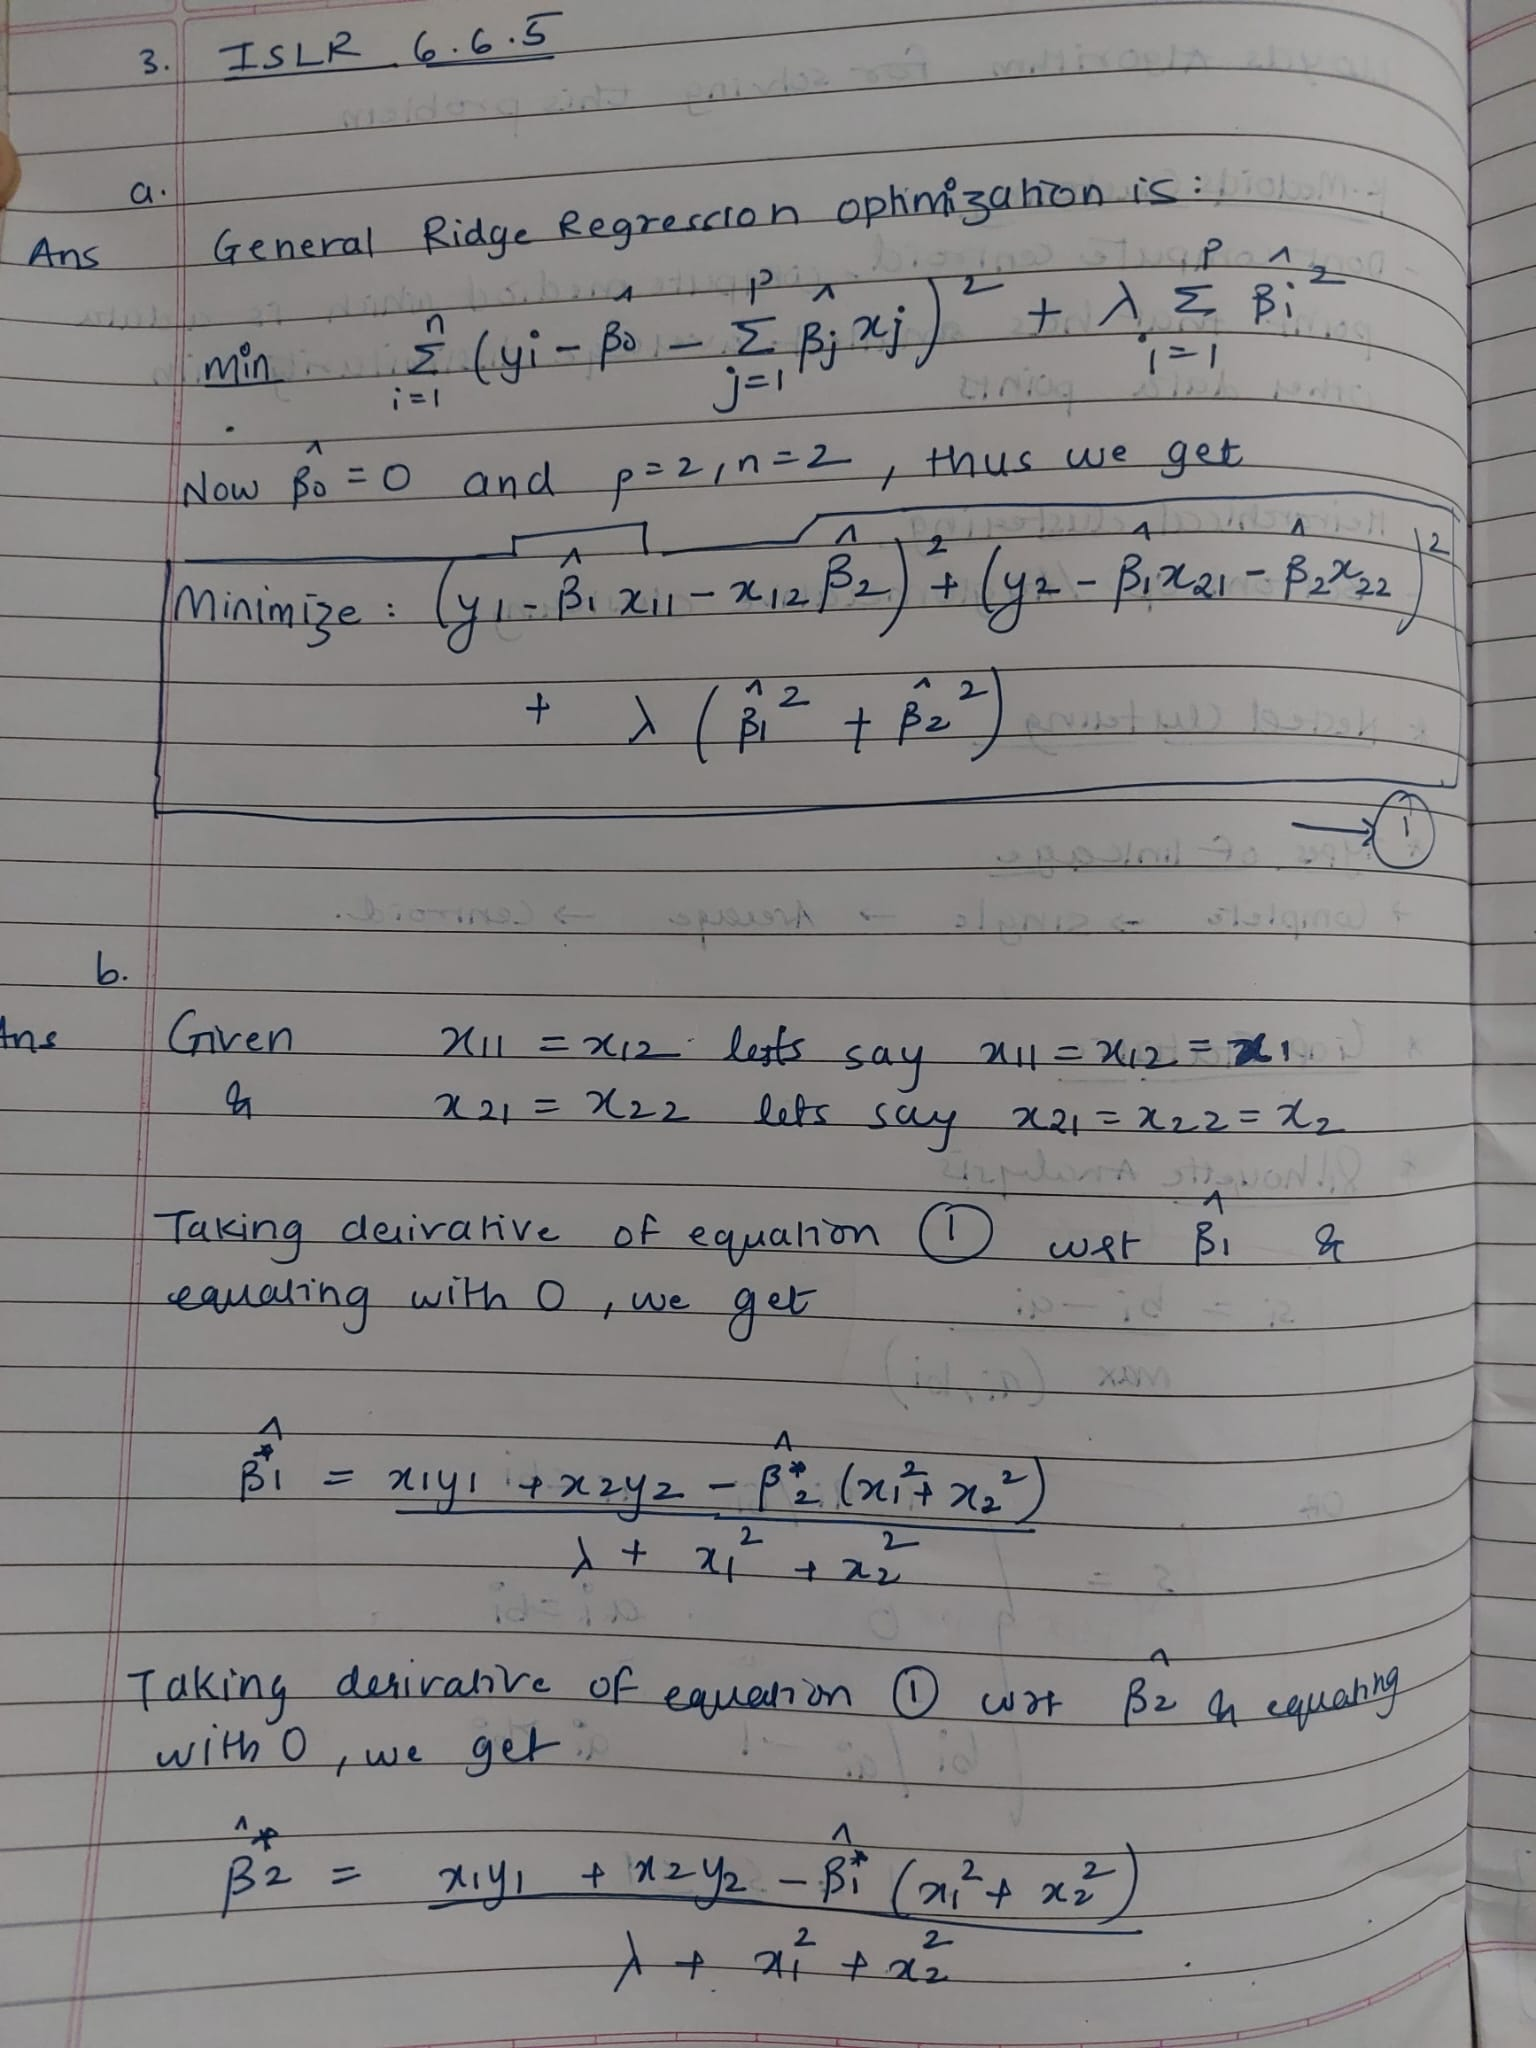

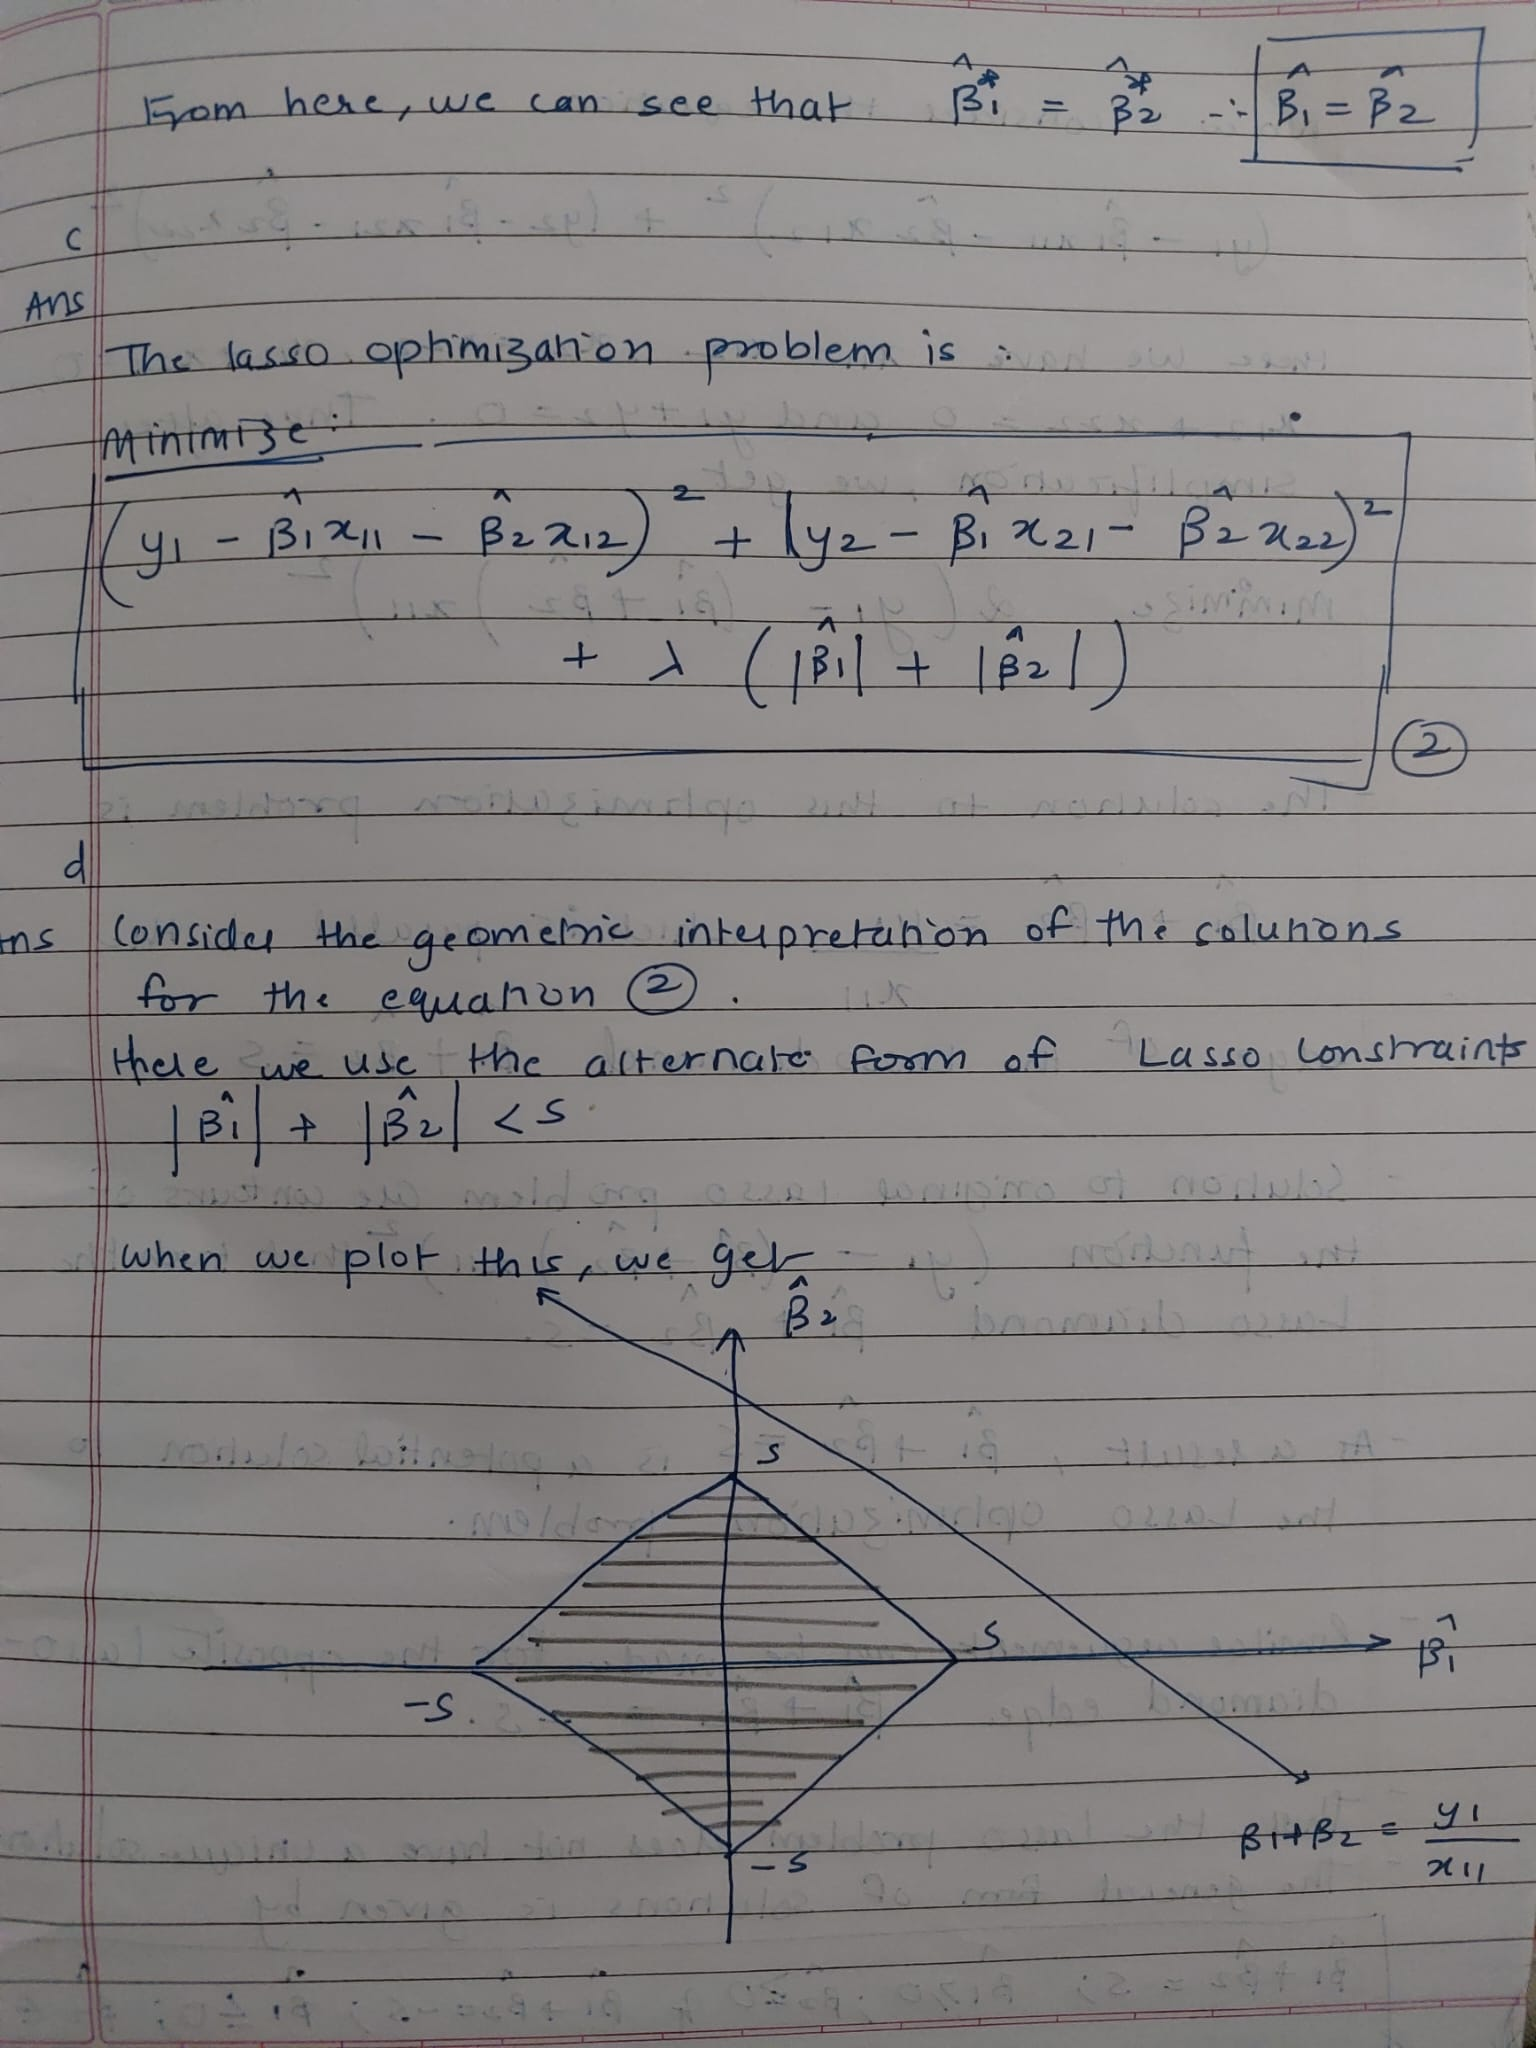

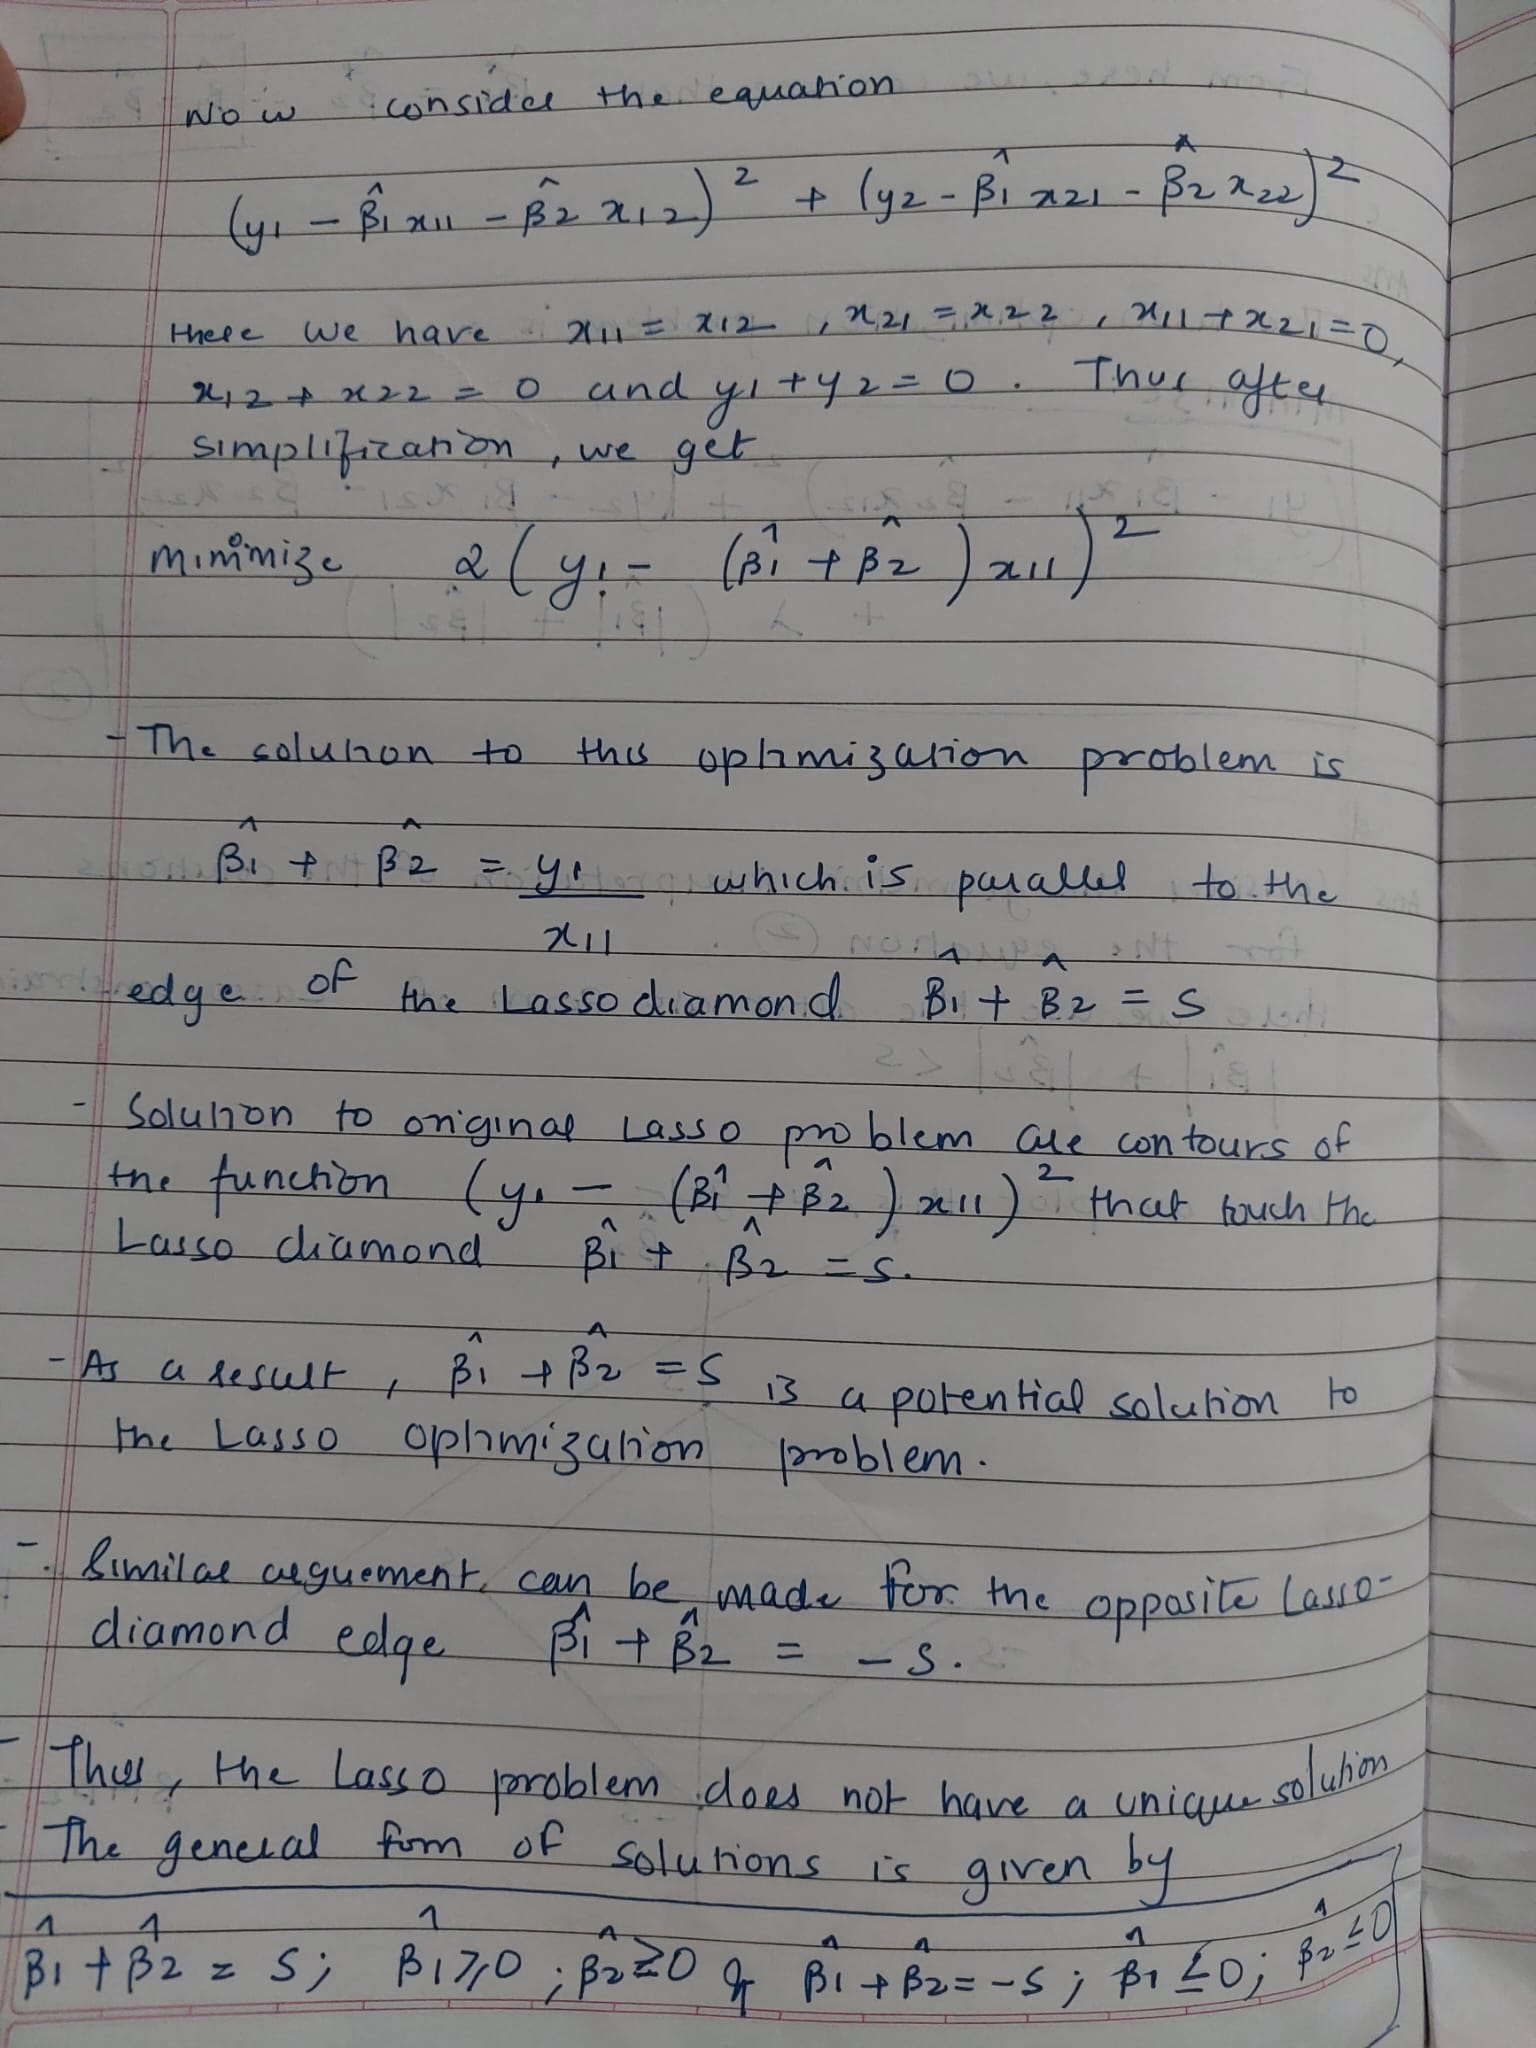

# 4.ISLR 8.4.5

# Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):

#               0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, and0.75.

# There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

# Ans: If we use majority vote approach, we see that that there are 4 observations which are less than 0.5 and 6 observations greater than 0.5. Thus we can predict that X is red. If we use the average approach, the average is 0.45 thus we can say that X is not red.

# 5.ISLR 9.7.3

# Here we explore the maximal margin classifier on a toy data set.

# (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.

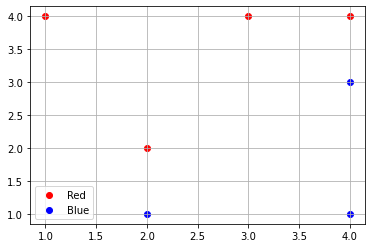

In [46]:
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]])
Y = np.array([1,1,1,1,0,0,0])
mplt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label='Red')
mplt.scatter(X[Y == 0, 0], X[Y == 0, 1], color="blue", label='Blue')
mplt.grid(True)
mplt.legend()

# (b) Sketch the optimal separating hyperplane, and provide the equa- tion for this hyperplane (of the form (9.1)).

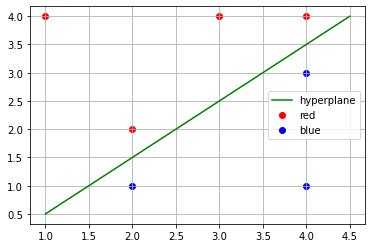

In [49]:
hplane = np.linspace(1, 4.5, 100)
mplt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label='red')
mplt.scatter(X[Y == 0, 0], X[Y == 0, 1], color="blue", label='blue')
mplt.plot(hplane, hplane - 0.5, color="green", label='hyperplane');
mplt.grid(True)
mplt.legend()

# (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

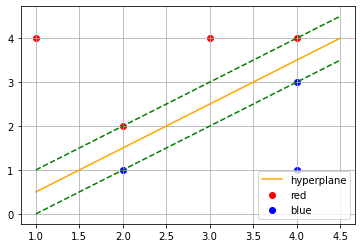

In [50]:
mplt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label='red')
mplt.scatter(X[Y == 0, 0], X[Y == 0, 1], color="blue", label='blue')
mplt.plot(hplane, hplane, color="green", linestyle='--');
mplt.plot(hplane, hplane- 0.5, color="orange", label='hyperplane');
mplt.plot(hplane, hplane - 1, color="green", linestyle='--');
mplt.grid(True)
mplt.legend()

# (d) On your sketch, indicate the margin for the maximal margin hyperplane.

# (e) Indicate the support vectors for the maximal margin classifier.

# Ans: The support vectors are the points (2,1), (2,2), (4,3) and (4,4)

# (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

# Ans: If we move any data points rather than support-vector. it would not change the margin

# (g) Sketch a hyperplane that is not the optimal separating hyper- plane, and provide the equation for this hyperplane.

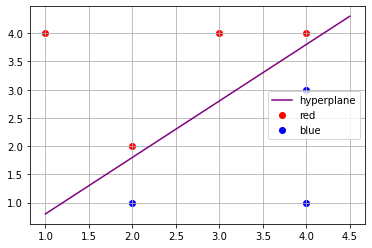

In [52]:
mplt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label='red')
mplt.scatter(X[Y == 0, 0], X[Y == 0, 1], color="blue", label='blue')
mplt.plot(hplane, hplane - 0.2, color="purple", label='hyperplane');
mplt.grid(True)
mplt.legend()

# (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane. 

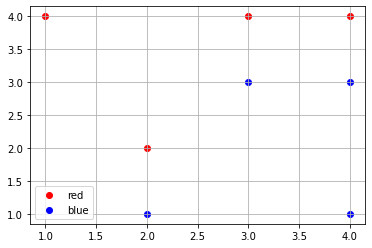

In [53]:
X = np.append(X, [[3,3]], axis = 0)
Y = np.append(Y, [0], axis= 0)
mplt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label='red')
mplt.scatter(X[Y == 0, 0], X[Y == 0, 1], color="blue", label='blue')
mplt.grid(True)
mplt.legend()